In [1]:
import ktrain
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import classification_report

CATEGORIES_LIST = ['Música e Áudio', 'Comunicação', 'Finanças', 'Entretenimento', 'Medicina', 'Comer e Beber', 'Corporativo', 'Estilo de Vida', 'Reproduzir e Editar Videos', 'Mapas e Navegação', 'Social', 'Fotografia', 'Compras', 'Produtividade', 'Educação', 'Livros e Referência', 'Encontro', 'Clima', 'Turismo e Local', 'Notícias e Revistas', 'Saúde', 'Personalização', 'Ferramentas', 'Casa', 'Veículo', 'Esportes', 'Arte e Design', 'Biblioteca', 'Criar os Filhos', 'Eventos', 'Humor', 'Mostradores de Relógio', 'Beleza']
NAME_TERMINAL = "ep1_non_context"
print("start")

start


In [2]:
#Importando a biblioteca pandas e carregando as amostras
df_test = pd.read_pickle('./Amostras_Teste.pkl')
print(df_test.shape)
df_test = df_test.dropna()
print(df_test.shape)
print("importou as bibliotecas")

(1104646, 6)
(1103844, 6)
importou as bibliotecas


In [3]:
#Load predictor
p = ktrain.load_predictor('./bert-base-multilingual-cased_e1_apps.model')
print("carregou o modelo")

carregou o modelo


ep1_context
17248/17248 [==============================] - 130925s 8s/step
terminado as predições
17248/17248 [==============================] - 130896s 8s/step
terminado as probabilidades de predições
              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92    275984
    Positive       0.92      0.92      0.92    275938

    accuracy                           0.92    551922
   macro avg       0.92      0.92      0.92    551922
weighted avg       0.92      0.92      0.92    551922

Fim da execução de ep1_context


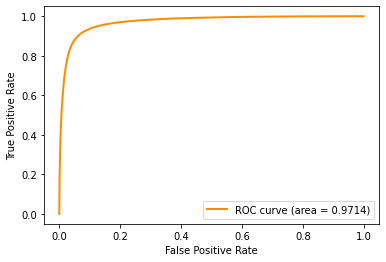

In [6]:
# teste com contexto
df_test = df_test.head(round(len(df_test)/2))
#x_test = df_test[['review', 'category']].values
#x_test = list(map(tuple, x_test))
x_test = df_test.review.values
y_true = [df_test.label_feelings.values, df_test.negative_index.values]

#Amostras gerais
print(NAME_TERMINAL)
#y_pred = p.predict(x_test)
#print("terminado as predições")
y_pred_proba = p.predict_proba(x_test)
print("terminado as probabilidades de predições")
#Exibindo as métricas obtidas
#print(classification_report(y_true[0][0:len(y_pred)], y_pred))
#Calculando a curva ROC e AUC
fpr, tpr, _ = metrics.roc_curve(y_true[1],  y_pred_proba[:, 0])
auc = metrics.roc_auc_score(y_true[1],  y_pred_proba[:, 0])
#create ROC curve
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % auc,
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig("./00 - imagens/"+NAME_TERMINAL+".png", 
            dpi=300,
            transparent=True)

print("Fim da execução de "+NAME_TERMINAL)